### Librerias Implementadas

In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import pickle
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


### Especificación de las carpetas

In [6]:
base_path = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica5_(ParcialFinal)\Base_datos'
folder = 'Grietas_NoGrietas'
sub_folders = ['Con_Grietas', 'Sin_Grietas']

### Adquisión de Datos

In [7]:
data = []
labels = []
for subfolder in sub_folders:
    files = [f for f in os.listdir(base_path + '/' + folder + '/' + subfolder) if f.endswith('.jpg')]
    for file in files:
        img = cv2.imread(base_path + '/' + folder + '/' + subfolder + '/' + file, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = img.astype('float32') / 255.0
        data.append(img)
        labels.append(subfolder)

### Procesamiento de etiquetas


In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels).flatten()
print(labels)

[0 0 0 ... 1 1 1]


### Implementación de train_test_split primera partición

In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.2, random_state=1)

### Se vuelven a partir los datos para Obtener datos de validacion

In [10]:
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

### Guardar el modelo completo (arquitectura, pesos y configuración)

In [11]:
model = load_model(r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica5_(ParcialFinal)\Modelos_Generados\CrackDetectorV1.h5')


In [15]:
# Realizar predicciones
predictions_prob = model.predict(valX)
predicted_classes = (predictions_prob > 0.5).astype("int32")


In [16]:
valY_binary = valY.astype("int32")
print(valY_binary)

[0 1 1 ... 1 0 1]


### Predicciones y reporte

In [17]:
# Calcular las métricas comunes
accuracy = accuracy_score(valY_binary, predicted_classes)
precision = precision_score(valY_binary, predicted_classes)
recall = recall_score(valY_binary, predicted_classes)
f1 = f1_score(valY_binary, predicted_classes)
roc_auc = roc_auc_score(valY_binary, predictions_prob)


In [18]:
# Mostrar el reporte de clasificación
print(classification_report(valY_binary, predicted_classes, target_names=['Sin Grieta', 'Con Grieta']))


              precision    recall  f1-score   support

  Sin Grieta       1.00      1.00      1.00      3955
  Con Grieta       1.00      1.00      1.00      4045

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



Confusion Matrix:
[[3948    7]
 [   7 4038]]


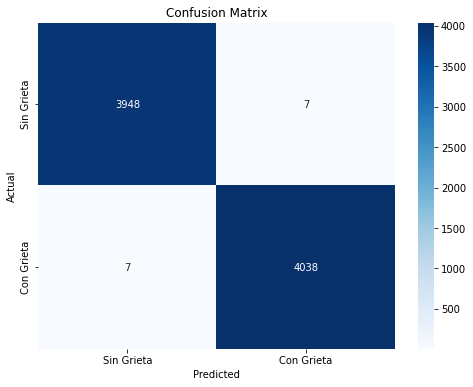

In [25]:

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(valY_binary, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Dibujar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin Grieta', 'Con Grieta'], yticklabels=['Sin Grieta', 'Con Grieta'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Mostrar las métricas calculadas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 0.9982
Precision: 0.9983
Recall: 0.9983
F1 Score: 0.9983
ROC AUC: 0.9999


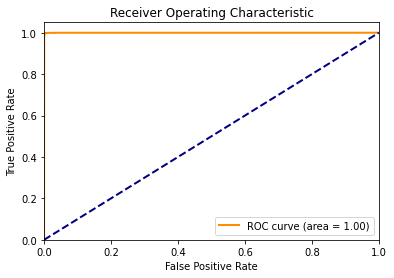

In [27]:
# Calcular y mostrar la curva ROC
fpr, tpr, _ = roc_curve(valY_binary, predictions_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Bucle para mostrar imágenes incorrectas

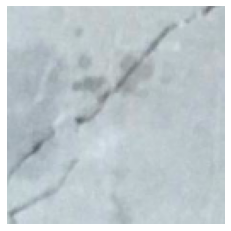

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 99.73%
Wrong prediction#####################################################


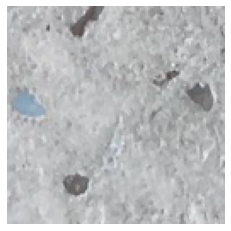

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 0.35%
Wrong prediction#####################################################


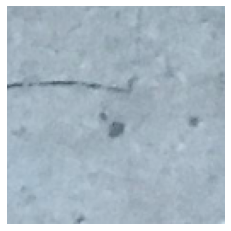

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 6.61%
Wrong prediction#####################################################


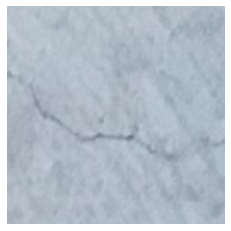

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 97.44%
Wrong prediction#####################################################


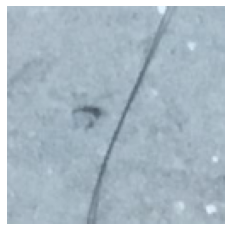

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 0.01%
Wrong prediction#####################################################


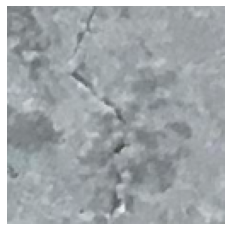

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 20.35%
Wrong prediction#####################################################


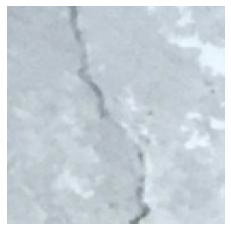

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 98.45%
Wrong prediction#####################################################


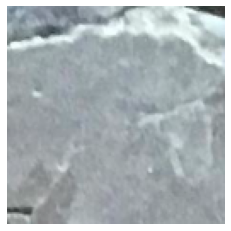

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 99.30%
Wrong prediction#####################################################


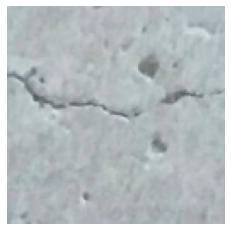

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 0.00%
Wrong prediction#####################################################


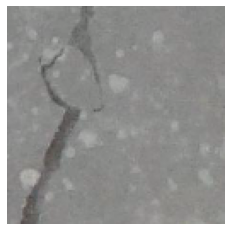

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 93.55%
Wrong prediction#####################################################


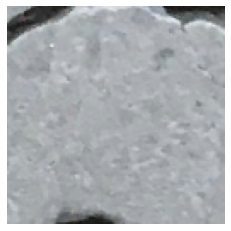

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 58.31%
Wrong prediction#####################################################


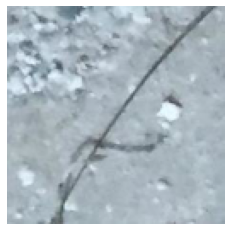

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 0.06%
Wrong prediction#####################################################


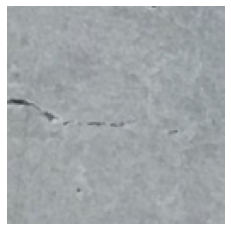

Ground truth class: Con_Grietas
Predicted class: Sin_Grietas
Prediction confidence: 91.87%
Wrong prediction#####################################################


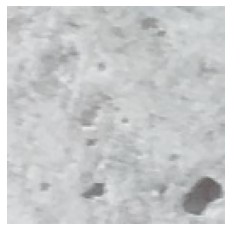

Ground truth class: Sin_Grietas
Predicted class: Con_Grietas
Prediction confidence: 17.94%
Wrong prediction#####################################################


In [31]:
predictions_prob = model.predict(valX)
predicted_classes = (predictions_prob > 0.5).astype("int32")

# Encontrar las posiciones de las predicciones incorrectas
incorrect_indices = [i for i in range(len(valX)) if valY[i] != predicted_classes[i][0]]

# Mostrar las predicciones incorrectas
for idx in incorrect_indices:
    rand_img = valX[idx]
    
    # Mostrar la imagen con matplotlib
    plt.imshow(rand_img)  
    plt.axis('off')  # Ocultar los ejes
    plt.show()
    
    # Mostrar la clase real y predicha
    ground_truth_class = lb.classes_[valY[idx]]
    predicted_class = lb.classes_[predicted_classes[idx][0]]
    prediction_confidence = predictions_prob[idx][0] * 100  # Convertir a porcentaje
    
    print(f'Ground truth class: {ground_truth_class}')
    print(f'Predicted class: {predicted_class}')
    print(f'Prediction confidence: {prediction_confidence:.2f}%')
    print('Wrong prediction#####################################################')

### Datos erroneos 14 de 8000

aproximadamente = 0.175 % de error